(1000, 1000, 3)
<class 'numpy.ndarray'>


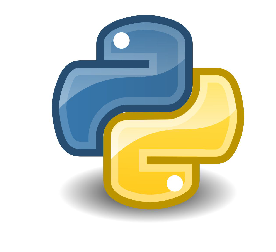

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
img=Image.open('img.jpg')
print(np.array(img).shape)
plt.figure('img')
plt.imshow(np.array(img))
print(type(np.array(img)))
plt.axis('off')
plt.show()

In [75]:
import torch
import torchvision
import torchvision.transforms as transforms

In [77]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
#trainloader:每张图都是3×32×32，4张图一组（batch_size=4），每组都是一个列表，第一个元素是4张图的像素值，第二个元素是4张图的类别。共12500组，50000张图
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=False,transform=transform)
#testloader:每张图都是3×32×32，4张图一组（batch_size=4），每组都是一个列表，第一个元素是4张图的像素值，第二个元素是4张图的类别。共5000组，20000张图
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes=('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.pool=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=Net()
print(net)

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [83]:
# 训练模型
criterion=nn.CrossEntropyLoss()
import torch.optim as optim
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
for epoch in range(2):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        inputs,labels=Variable(inputs),Variable(labels)

        optimizer.zero_grad()
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss+=loss.data[0]

        if i%2000==1999:
            print('[%5d %5d] loss:%.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss=0.0
print('Finished Training!')

[    1  2000] loss:2.206
[    1  4000] loss:1.864
[    1  6000] loss:1.670
[    1  8000] loss:1.560
[    1 10000] loss:1.514
[    1 12000] loss:1.478
[    2  2000] loss:1.401
[    2  4000] loss:1.379
[    2  6000] loss:1.345
[    2  8000] loss:1.319
[    2 10000] loss:1.297
[    2 12000] loss:1.283
Finished Training!


In [87]:
# 测试模型
correct=0
total=0
for i,data in enumerate(testloader):
    inputs,labels=data
    outputs=net(Variable(inputs))
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum()
print('Accuracy on test set is: ',correct/total)

Accuracy on test set is:  0.5523


In [95]:
# 各类准确率
class_correct=list(0. for i in range(10))
class_total=list(0. for i in range(10))
for i,data in enumerate(testloader):
    inputs,labels=data
    outputs=net(Variable(inputs))
    _,predicted=torch.max(outputs.data,1)
    c=(predicted==labels).squeeze()
    for i in range(4):
        label=labels[i]
        class_correct[label]+=c[i]
        class_total[label]+=1
for i in range(10):
    print('the accuracy of class %s is: %.3f'%(classes[i],class_correct[i]/class_total[i]))

the accuracy of class plane is: 0.567
the accuracy of class car is: 0.781
the accuracy of class bird is: 0.289
the accuracy of class cat is: 0.429
the accuracy of class deer is: 0.433
the accuracy of class dog is: 0.379
the accuracy of class frog is: 0.737
the accuracy of class horse is: 0.639
the accuracy of class ship is: 0.620
the accuracy of class truck is: 0.649
